# Ridge Regression with Holdout: Gas Mileage Prediction

      mpg  displacement  horsepower  weight  acceleration
0    18.0         307.0       130.0    3504          12.0
1    15.0         350.0       165.0    3693          11.5
2    18.0         318.0       150.0    3436          11.0
3    16.0         304.0       150.0    3433          12.0
4    17.0         302.0       140.0    3449          10.5
..    ...           ...         ...     ...           ...
393  27.0         140.0        86.0    2790          15.6
394  44.0          97.0        52.0    2130          24.6
395  32.0         135.0        84.0    2295          11.6
396  28.0         120.0        79.0    2625          18.6
397  31.0         119.0        82.0    2720          19.4

[392 rows x 5 columns]


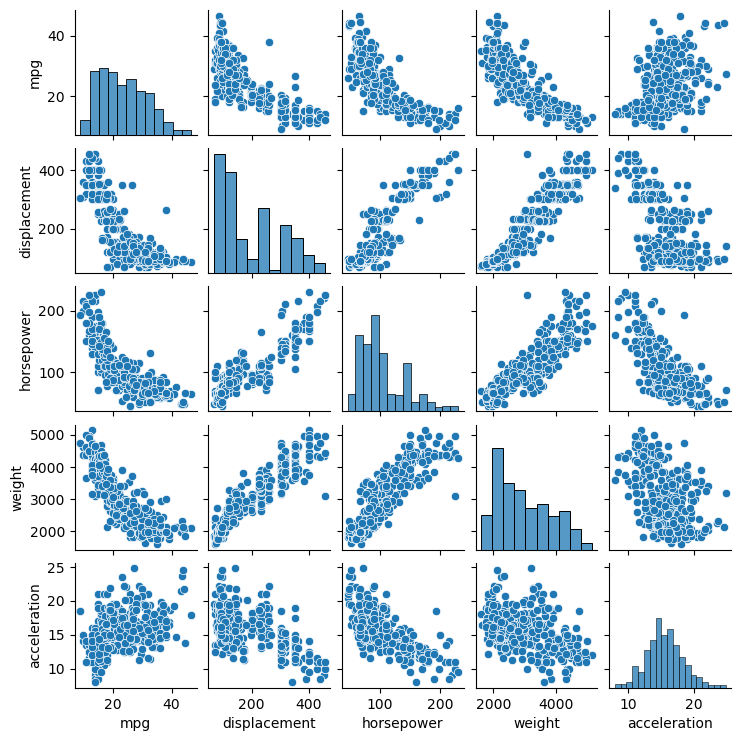

In [1]:
import numpy as np
import pandas as pd
import piplite
await piplite.install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Reference: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

df = pd.read_csv("auto_mpg.csv")
df.drop(df.columns[[1, 6, 7, 8]], axis=1, inplace=True)    # Discard the discrete-valued features
df.dropna(axis=0, inplace=True)                            # Discard rows with missing values
print(df)
sns.pairplot(df, height=1.5)
plt.show()

Split the data into 70% training, 15% validation, and 15% testing.

In [2]:
# Extract the regressors and the target from the data frame
x, y = df.iloc[:,1:].to_numpy(), df.iloc[:,0].to_numpy()

# Hold out the validation and test data
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.1, 0.5, 1, 5, 10, 50, 100]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

(274, 4)
(59, 4)
(59, 4)
Alpha: 0.0
	Coefficients: [-1.13119186 -1.18514945 -4.45320355 -0.02143731]
	Intercept: 23.16897810218978
	Training accuracy (R2): 0.7163772295250078
	Validation accuracy (R2): 0.7311232674499166
Alpha: 0.1
	Coefficients: [-1.13920777 -1.1888433  -4.44187774 -0.02378093]
	Intercept: 23.16897810218978
	Training accuracy (R2): 0.7163770067949722
	Validation accuracy (R2): 0.7311449733206556
Alpha: 0.5
	Coefficients: [-1.17020165 -1.20315672 -4.39789812 -0.0327753 ]
	Intercept: 23.16897810218978
	Training accuracy (R2): 0.7163719069815744
	Validation accuracy (R2): 0.7312265445875917
Alpha: 1.0
	Coefficients: [-1.20668383 -1.22007015 -4.34572296 -0.04321534]
	Intercept: 23.16897810218978
	Training accuracy (R2): 0.7163570699068773
	Validation accuracy (R2): 0.731317746966866
Alpha: 5.0
	Coefficients: [-1.42988502 -1.32535156 -4.01375903 -0.1023958 ]
	Intercept: 23.16897810218978
	Training accuracy (R2): 0.7160307781509576
	Validation accuracy (R2): 0.7317586233307

Evaluate the best model on test data.

Best alpha: 10.0
Coefficients: [-1.60167334 -1.40918408 -3.73352704 -0.13865552]
Intercept: 23.16897810218978
Testing accuracy (R2) of Best Model: 0.6235892166451618


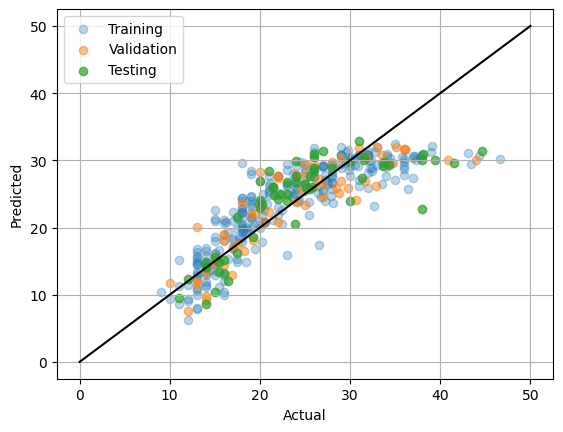

In [3]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

# Plot the Actual vs. Predicted values
test_R2 = best_mdl.score(X_test,y_test)
print(f"Testing accuracy (R2) of Best Model: {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()